### Importing Required libraries

In [1]:
import pandas as pd               #for data manipulation
import numpy as np                #for representing multi-feature data in array and for fast matrix operations
import seaborn as sns             #for data visualization
import matplotlib.pyplot as plt   #for data visualization
%matplotlib inline

### Loading training and testing data

In [2]:
df= pd.read_csv('land_train.csv') #training data

In [96]:
df_test=pd.read_csv('land_test.csv') #testing data

### Look at the data

In [3]:
df.head()

,X1,X2,X3,X4,X5,X6,I1,I2,I3,I4,I5,I6,target
0,323,229,120,517,209,115,0.623234,-1.047476,1.473405,0.380537,-0.021277,0.424242,1
1,335,220,109,387,149,89,0.560484,-1.004514,1.200777,0.324813,-0.101010,0.444030,1
2,255,150,52,184,72,45,0.559322,-0.996822,0.825000,0.300728,-0.072165,0.437500,1
3,254,182,73,413,156,84,0.699588,-1.151258,1.425354,0.436268,0.070064,0.451670,1
4,257,219,100,722,254,130,0.756691,-1.236199,1.990973,0.506155,0.130435,0.479508,1


#### How many features?

In [5]:
#Looking for features
df.columns.values

array(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'I1', 'I2', 'I3', 'I4', 'I5',
       'I6', 'target'], dtype=object)

In [7]:
#Information about those features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110000 entries, 0 to 109999
Data columns (total 13 columns):
X1        110000 non-null int64
X2        110000 non-null int64
X3        110000 non-null int64
X4        110000 non-null int64
X5        110000 non-null int64
X6        110000 non-null int64
I1        110000 non-null float64
I2        110000 non-null float64
I3        110000 non-null float64
I4        110000 non-null float64
I5        110000 non-null float64
I6        110000 non-null float64
target    110000 non-null int64
dtypes: float64(6), int64(7)
memory usage: 10.9 MB


In [8]:
#Looking at data types
df.dtypes

X1          int64
X2          int64
X3          int64
X4          int64
X5          int64
X6          int64
I1        float64
I2        float64
I3        float64
I4        float64
I5        float64
I6        float64
target      int64
dtype: object

In [10]:
#Looking at the shape
df.shape

(110000, 13)

In [11]:
#Different classes available
target = df['target'].unique()
target

array([1, 2, 4, 3])

In [12]:
classes=len(target)
classes

4

This means our data has 12 features , one target variable and 110000 different observations. The target variable has 4 classes which are as follows:

* Classes
    * 1 = Green Land
    * 2 = Water
    * 3 = Barren Land
    * 4 = Built-up 



#### Data Description

In [13]:
df.describe()

,X1,X2,X3,X4,X5,X6,I1,I2,I3,I4,I5,I6,target
count,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000
mean,505.820582,778.290627,819.375336,1752.844418,1078.027418,739.470318,0.384085,-0.712814,1.615682,0.304885,-0.046779,0.328729,1.909091
std,428.347173,529.490028,674.422188,693.583645,868.842300,797.061740,0.387576,0.472998,1.652829,0.262865,0.421622,0.268098,0.995864
min,0.000000,79.000000,0.000000,77.000000,52.000000,25.000000,-0.517672,-1.566332,-2.842839,-0.390293,-0.904241,-0.822989,1.000000
25%,172.000000,333.000000,211.000000,1209.000000,256.000000,190.000000,-0.006770,-1.212487,-0.042051,0.041264,-0.474310,0.035974,1.000000
50%,540.000000,809.500000,817.000000,1785.000000,863.000000,346.000000,0.222476,-0.681110,1.048291,0.210903,0.170455,0.394099,2.000000
75%,699.000000,1022.000000,1237.000000,2148.000000,1601.000000,1245.000000,0.810632,-0.186692,3.352103,0.587857,0.257062,0.463504,3.000000
max,9346.000000,9615.000000,9877.000000,9316.000000,8249.000000,7180.000000,1.000000,1.144574,5.833693,0.930116,1.000000,0.881131,4.000000


#### Data Visualization

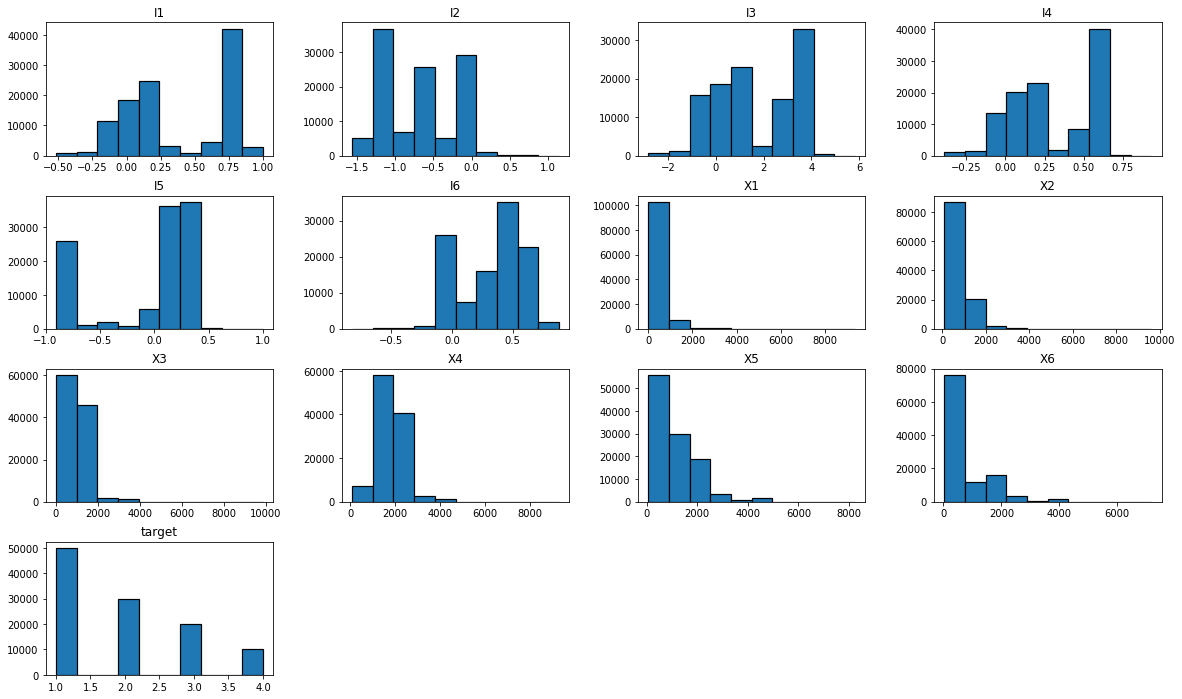

In [14]:
df.hist(edgecolor='black', linewidth=1.2,grid=False)
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

This is visualization of the value taken by each of the feature vs the count (no. of times it occured in the whole data).


### Now let us see how the effect of each feature on the final target result.

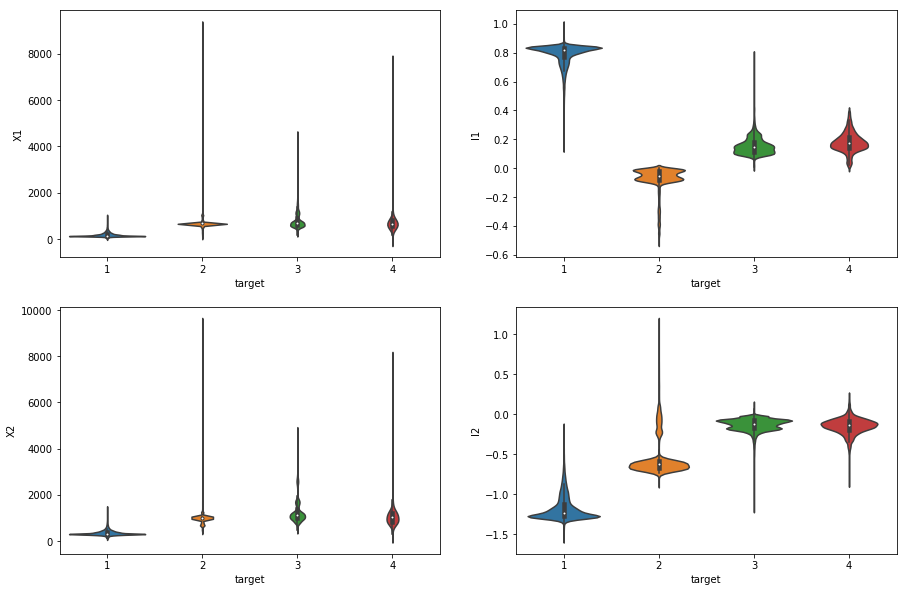

In [15]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='target',y='X1',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='target',y='I1',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='target',y='X2',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='target',y='I2',data=df)


plt.show()

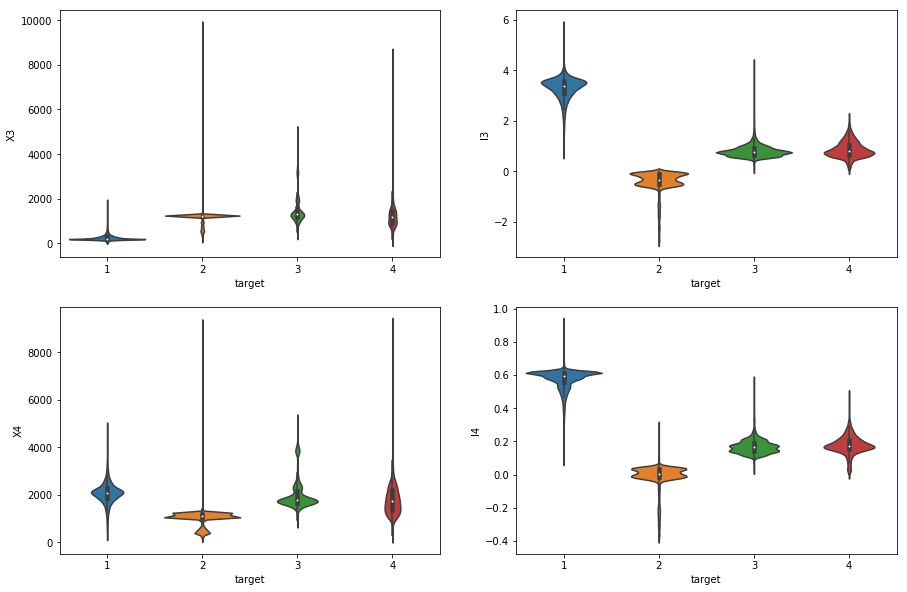

In [16]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='target',y='X3',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='target',y='I3',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='target',y='X4',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='target',y='I4',data=df)
plt.show()

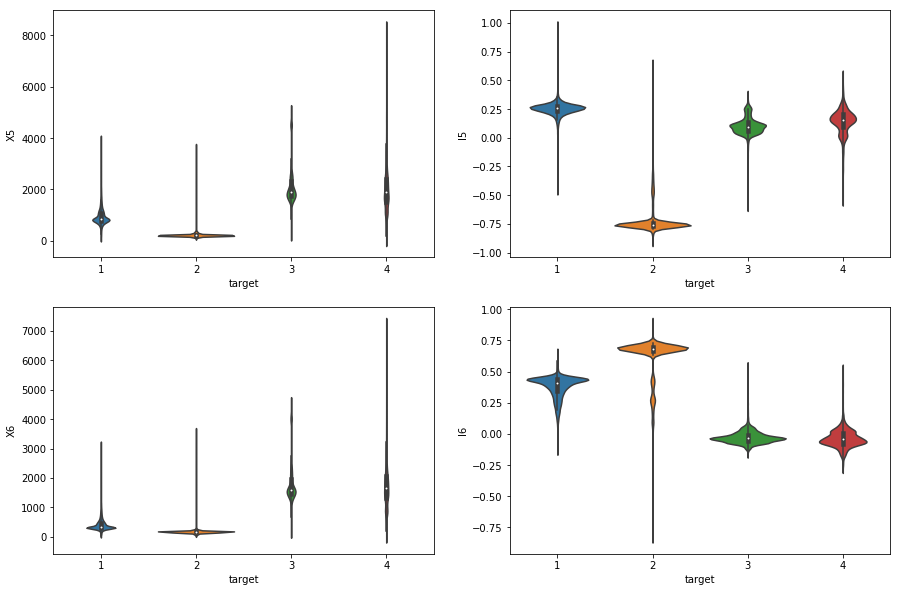

In [17]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.violinplot(x='target',y='X5',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='target',y='I5',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='target',y='X6',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='target',y='I6',data=df)
plt.show()

### Correlation Matrix

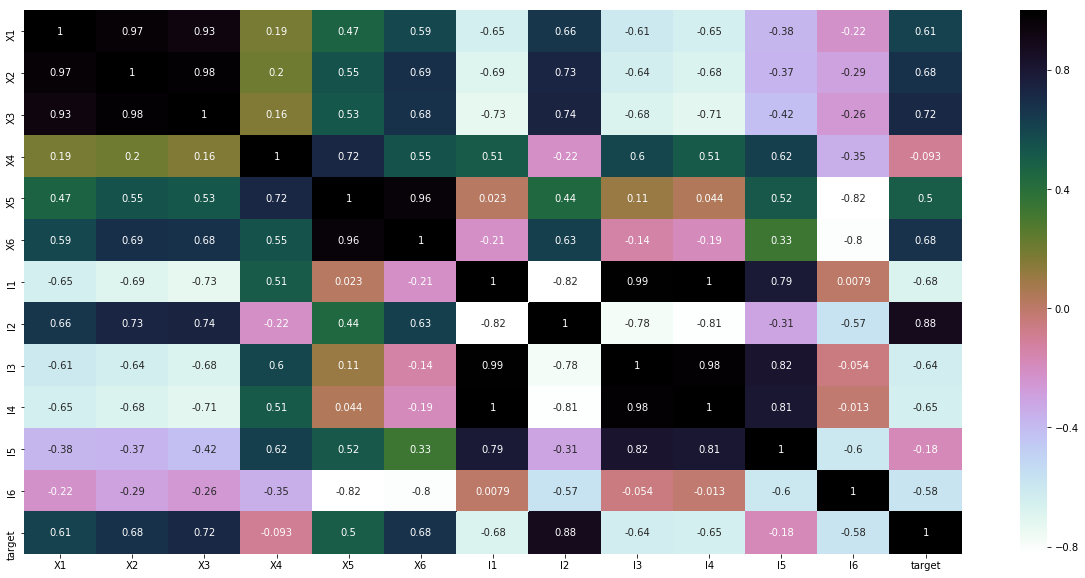

In [18]:
plt.figure(figsize=(21,10)) 
sns.heatmap(df.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(df.corr())
plt.show()


It can be useful in data analysis and modeling to better understand the relationships between variables. The statistical relationship between two variables is referred to as their correlation.

If we apply .corr directly to our dataframe, it will return all pairwise correlations between our columns; that's why we then observe 1s at the diagonal of our matrix (each column is perfectly correlated with itself).

A correlation could be positive, meaning both variables move in the same direction, or negative, meaning that when one variable’s value increases, the other variables’ values decrease. Correlation can also be neural or zero, meaning that the variables are unrelated.

<B> Positive Correlation : </B> both variables change in the same direction.
<B> Neutral Correlation:</B> No relationship in the change of the variables.
<B> Negative Correlation: </B> variables change in opposite directions.

### Plotting some of the correlations to see how they affect the target variable.

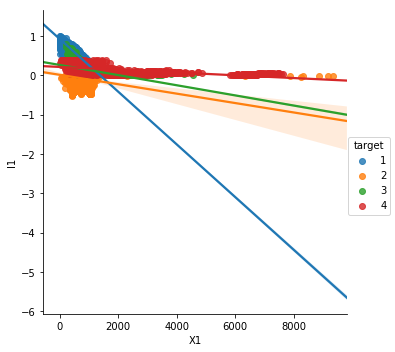

In [19]:
g = sns.lmplot(x="X1", y="I1", hue="target", data=df)

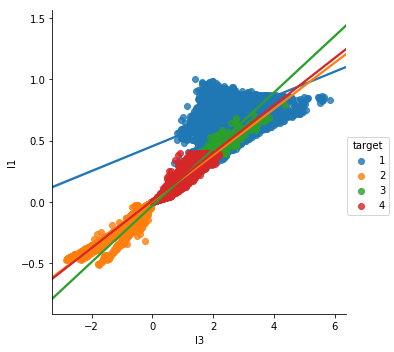

In [20]:
g = sns.lmplot(x="I3", y="I1", hue="target", data=df)

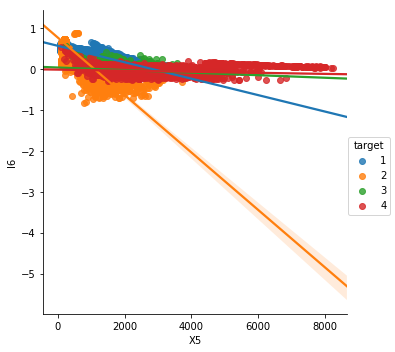

In [21]:
g = sns.lmplot(x="X5", y="I6", hue="target", data=df)


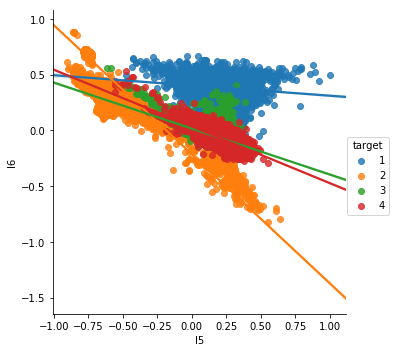

In [22]:
g = sns.lmplot(x="I5", y="I6", hue="target", data=df)

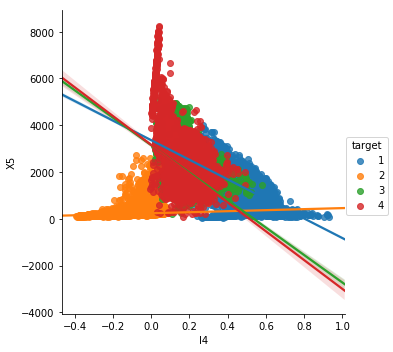

In [23]:
g = sns.lmplot(x="I4", y="X5", hue="target", data=df)

### Data Preprocessing

In [25]:
#Dropping the target variable to make a dataframe of all the features.
X=df.drop('target',axis=1)

In [26]:
X.head()

,X1,X2,X3,X4,X5,X6,I1,I2,I3,I4,I5,I6
0,323,229,120,517,209,115,0.623234,-1.047476,1.473405,0.380537,-0.021277,0.424242
1,335,220,109,387,149,89,0.560484,-1.004514,1.200777,0.324813,-0.101010,0.444030
2,255,150,52,184,72,45,0.559322,-0.996822,0.825000,0.300728,-0.072165,0.437500
3,254,182,73,413,156,84,0.699588,-1.151258,1.425354,0.436268,0.070064,0.451670
4,257,219,100,722,254,130,0.756691,-1.236199,1.990973,0.506155,0.130435,0.479508


In [27]:
#Dataframe of target variable
Y=pd.DataFrame(df['target'])

In [28]:
Y.head()

,target
0,1
1,1
2,1
3,1
4,1


In [30]:
#converting classes to one hot vector style
Y_dum=pd.get_dummies(df['target']).values

In [31]:
Y_dum

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       ...,
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0]], dtype=uint8)

In [32]:
X=X.values
Y=Y.values

In [33]:
X

array([[ 3.23000000e+02,  2.29000000e+02,  1.20000000e+02, ...,
         3.80537331e-01, -2.12765951e-02,  4.24242437e-01],
       [ 3.35000000e+02,  2.20000000e+02,  1.09000000e+02, ...,
         3.24813038e-01, -1.01010099e-01,  4.44029838e-01],
       [ 2.55000000e+02,  1.50000000e+02,  5.20000000e+01, ...,
         3.00728500e-01, -7.21649453e-02,  4.37500000e-01],
       ...,
       [ 6.04000000e+02,  9.87000000e+02,  1.19900000e+03, ...,
         1.72716945e-01,  8.92518014e-02,  1.57164875e-02],
       [ 5.59000000e+02,  9.19000000e+02,  1.11200000e+03, ...,
         1.89011291e-01,  1.37315750e-01, -2.10430007e-02],
       [ 5.32000000e+02,  8.85000000e+02,  1.05800000e+03, ...,
         2.03616351e-01,  1.76653698e-01, -4.84160185e-02]])

In [34]:
Y

array([[1],
       [1],
       [1],
       ...,
       [3],
       [3],
       [3]])

### loading test data

In [97]:
df_test.head()

,X1,X2,X3,X4,X5,X6,I1,I2,I3,I4,I5,I6
0,338,554,698,1605,1752,1310,0.393834,-0.350045,1.565423,0.311659,0.304781,-0.043789
1,667,976,1187,1834,1958,1653,0.214167,-0.181467,1.050679,0.196439,0.164085,-0.032700
2,249,420,402,1635,1318,736,0.605302,-0.712650,2.268984,0.441984,0.293497,0.107348
3,111,348,279,1842,743,328,0.736917,-1.162062,3.074176,0.551699,0.080725,0.425145
4,349,559,642,1534,1544,989,0.409926,-0.406678,1.607795,0.323984,0.212753,-0.003249


In [98]:
df_test_np=df_test.values

In [99]:
df_test_np

array([[ 3.38000000e+02,  5.54000000e+02,  6.98000000e+02, ...,
         3.11658764e-01,  3.04780876e-01, -4.37890974e-02],
       [ 6.67000000e+02,  9.76000000e+02,  1.18700000e+03, ...,
         1.96438863e-01,  1.64084507e-01, -3.27004219e-02],
       [ 2.49000000e+02,  4.20000000e+02,  4.02000000e+02, ...,
         4.41983825e-01,  2.93497364e-01,  1.07348459e-01],
       ...,
       [ 4.07000000e+02,  5.29000000e+02,  6.07000000e+02, ...,
         1.55119121e-01,  1.54006969e-01, -2.88951841e-02],
       [ 3.76000000e+02,  5.89000000e+02,  6.07000000e+02, ...,
         3.42194308e-01,  1.96026490e-01,  7.07841777e-02],
       [ 5.67000000e+02,  8.58000000e+02,  9.89000000e+02, ...,
         2.92641380e-01,  2.61389096e-01, -2.92906178e-02]])

In [48]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, Y_dum, test_size=0.2,random_state=42,stratify=Y,shuffle=True)

In [54]:
X_train.shape

(88000, 12)

In [55]:
X_test.shape

(22000, 12)

In [63]:
# Creating a model
np.random.seed(1337)
#while initializing weights using w=np.random.random*np.sqrt(2/n[l-1])
# Import `Sequential` from `keras.models`
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(7, activation='sigmoid', input_shape=(12,)))

# Add one hidden layer 
model.add(Dense(6, activation='sigmoid'))

# Add an output layer 
model.add(Dense(classes, activation='softmax'))

In [64]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 7)                 91        
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 48        
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 28        
Total params: 167
Trainable params: 167
Non-trainable params: 0
_________________________________________________________________


In [65]:
# Compiling model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [66]:
history=model.fit(X_train, y_train, epochs=100, validation_data=[X_test,y_test],verbose=2, batch_size=128,
                                    initial_epoch=0, shuffle=True)

Train on 88000 samples, validate on 22000 samples
Epoch 1/100
 - 1s - loss: 0.8667 - acc: 0.7099 - val_loss: 0.5362 - val_acc: 0.9006
Epoch 2/100
 - 1s - loss: 0.3917 - acc: 0.9000 - val_loss: 0.3044 - val_acc: 0.9008
Epoch 3/100
 - 1s - loss: 0.2707 - acc: 0.9019 - val_loss: 0.2490 - val_acc: 0.9019
Epoch 4/100
 - 1s - loss: 0.2375 - acc: 0.9022 - val_loss: 0.2318 - val_acc: 0.9016
Epoch 5/100
 - 1s - loss: 0.2307 - acc: 0.9000 - val_loss: 0.2249 - val_acc: 0.9006
Epoch 6/100
 - 2s - loss: 0.2231 - acc: 0.9015 - val_loss: 0.2226 - val_acc: 0.9014
Epoch 7/100
 - 1s - loss: 0.2210 - acc: 0.9033 - val_loss: 0.2203 - val_acc: 0.9041
Epoch 8/100
 - 1s - loss: 0.2162 - acc: 0.9034 - val_loss: 0.2140 - val_acc: 0.9014
Epoch 9/100
 - 1s - loss: 0.2136 - acc: 0.9036 - val_loss: 0.2126 - val_acc: 0.9043
Epoch 10/100
 - 1s - loss: 0.2127 - acc: 0.9053 - val_loss: 0.2159 - val_acc: 0.9044
Epoch 11/100
 - 1s - loss: 0.2158 - acc: 0.9031 - val_loss: 0.2097 - val_acc: 0.9041
Epoch 12/100
 - 1s - los

In [67]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("\nAccuracy: %.2f%%" % (scores[1]*100))


Accuracy: 93.47%


In [68]:
# list all data in history
print(history.history.keys())
#print(scores.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


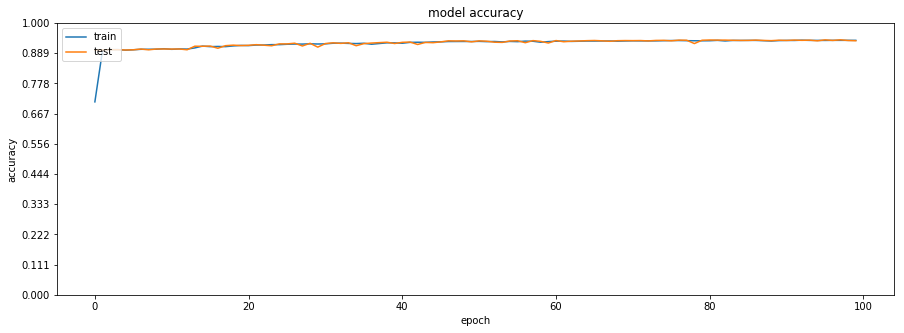

In [69]:
# summarize history for accuracy
ynum=np.linspace(0,1,10)
plt.figure(figsize=(15,5))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.yticks(ynum)  #no. of points on y axis
plt.legend(['train', 'test'], loc='upper left')
plt.show()

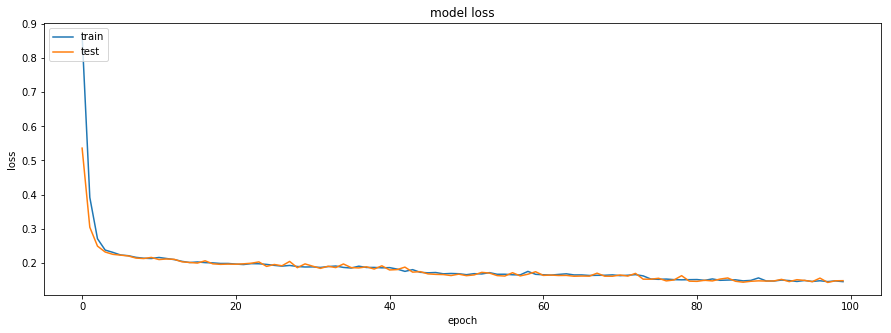

In [70]:
# summarize history for loss
plt.figure(figsize=(15,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [100]:
ans=model.predict(df_test_np)

In [101]:
ans

array([[1.2294597e-03, 6.8821560e-06, 5.4960388e-01, 4.4915986e-01],
       [1.2294597e-03, 6.8821560e-06, 5.4960388e-01, 4.4915986e-01],
       [9.9823195e-01, 1.1151118e-06, 1.6326106e-03, 1.3426351e-04],
       ...,
       [9.1093481e-03, 5.5623794e-04, 1.3677871e-01, 8.5355568e-01],
       [9.9823195e-01, 1.1151138e-06, 1.6326130e-03, 1.3426376e-04],
       [6.0356382e-02, 3.8239992e-05, 2.9732883e-01, 6.4227653e-01]],
      dtype=float32)

In [102]:
ans=np.argmax(ans,axis=1)

In [103]:
ans=pd.DataFrame(ans)

In [104]:
ans.head()

,0
0,2
1,2
2,0
3,0
4,3


In [105]:
ans[0]=ans[0]+1

In [106]:
ans.head()

,0
0,3
1,3
2,1
3,1
4,4


In [107]:
ans.columns=['target'] #renaming the column to be added in the test dataframe

In [108]:
ans.head()

,target
0,3
1,3
2,1
3,1
4,4


In [109]:
df_test.head()

,X1,X2,X3,X4,X5,X6,I1,I2,I3,I4,I5,I6
0,338,554,698,1605,1752,1310,0.393834,-0.350045,1.565423,0.311659,0.304781,-0.043789
1,667,976,1187,1834,1958,1653,0.214167,-0.181467,1.050679,0.196439,0.164085,-0.032700
2,249,420,402,1635,1318,736,0.605302,-0.712650,2.268984,0.441984,0.293497,0.107348
3,111,348,279,1842,743,328,0.736917,-1.162062,3.074176,0.551699,0.080725,0.425145
4,349,559,642,1534,1544,989,0.409926,-0.406678,1.607795,0.323984,0.212753,-0.003249


### Joining the predicted target values to the test dataset

In [111]:
df_test.join(ans, lsuffix='df_test', rsuffix='ans')

,X1,X2,X3,X4,X5,X6,I1,I2,I3,I4,I5,I6,target
0,338,554,698,1605,1752,1310,0.393834,-0.350045,1.565423,0.311659,0.304781,-0.043789,3
1,667,976,1187,1834,1958,1653,0.214167,-0.181467,1.050679,0.196439,0.164085,-0.032700,3
2,249,420,402,1635,1318,736,0.605302,-0.712650,2.268984,0.441984,0.293497,0.107348,1
3,111,348,279,1842,743,328,0.736917,-1.162062,3.074176,0.551699,0.080725,0.425145,1
4,349,559,642,1534,1544,989,0.409926,-0.406678,1.607795,0.323984,0.212753,-0.003249,4
5,363,496,501,833,800,564,0.248876,-0.269084,0.821571,0.215513,0.059155,0.020208,4
6,538,821,837,1224,1159,1034,0.187773,-0.215049,0.792773,0.189002,0.105291,0.027277,4
7,560,683,680,1018,965,764,0.199058,-0.225785,0.759024,0.168196,0.058172,0.026727,4
8,607,758,818,1164,1374,1142,0.174571,-0.091829,0.686800,0.153604,0.165306,-0.082742,4
9,231,434,363,2102,1167,568,0.705477,-0.991497,3.041530,0.509306,0.220193,0.286020,1


### Trying out different models

In [116]:
# Creating a model
np.random.seed(1337)
#while initializing weights using w=np.random.random*np.sqrt(2/n[l-1])
# Import `Sequential` from `keras.models`
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

# Initialize the constructor
model1 = Sequential()

# Add an input layer 
model1.add(Dense(128, activation='tanh', input_shape=(12,)))

# Add one hidden layer 
model1.add(Dense(64, activation='tanh'))

# Add one hidden layer 
model1.add(Dense(32, activation='relu'))

# Add one hidden layer 
model1.add(Dense(8, activation='relu'))

# Add an output layer 
model1.add(Dense(classes, activation='softmax'))

In [117]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 128)               1664      
_________________________________________________________________
dense_16 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_17 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_18 (Dense)             (None, 8)                 264       
_________________________________________________________________
dense_19 (Dense)             (None, 4)                 36        
Total params: 12,300
Trainable params: 12,300
Non-trainable params: 0
_________________________________________________________________


In [118]:
# Compiling model
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [119]:
history1=model1.fit(X_train, y_train, epochs=100, validation_data=[X_test,y_test],verbose=2, batch_size=512,
                                    initial_epoch=0, shuffle=True)

Train on 88000 samples, validate on 22000 samples
Epoch 1/100
 - 1s - loss: 0.4721 - acc: 0.7403 - val_loss: 0.1950 - val_acc: 0.9276
Epoch 2/100
 - 1s - loss: 0.1665 - acc: 0.9262 - val_loss: 0.1491 - val_acc: 0.9310
Epoch 3/100
 - 1s - loss: 0.1522 - acc: 0.9291 - val_loss: 0.1414 - val_acc: 0.9350
Epoch 4/100
 - 1s - loss: 0.1440 - acc: 0.9349 - val_loss: 0.1420 - val_acc: 0.9396
Epoch 5/100
 - 1s - loss: 0.1429 - acc: 0.9365 - val_loss: 0.1347 - val_acc: 0.9393
Epoch 6/100
 - 1s - loss: 0.1401 - acc: 0.9348 - val_loss: 0.1376 - val_acc: 0.9437
Epoch 7/100
 - 1s - loss: 0.1369 - acc: 0.9397 - val_loss: 0.1284 - val_acc: 0.9450
Epoch 8/100
 - 1s - loss: 0.1370 - acc: 0.9364 - val_loss: 0.1357 - val_acc: 0.9418
Epoch 9/100
 - 1s - loss: 0.1352 - acc: 0.9385 - val_loss: 0.1382 - val_acc: 0.9391
Epoch 10/100
 - 1s - loss: 0.1337 - acc: 0.9399 - val_loss: 0.1325 - val_acc: 0.9389
Epoch 11/100
 - 1s - loss: 0.1340 - acc: 0.9396 - val_loss: 0.1349 - val_acc: 0.9305
Epoch 12/100
 - 1s - los

In [120]:
scores = model1.evaluate(X_test, y_test, verbose=0)
print("\nAccuracy: %.2f%%" % (scores[1]*100))


Accuracy: 94.82%


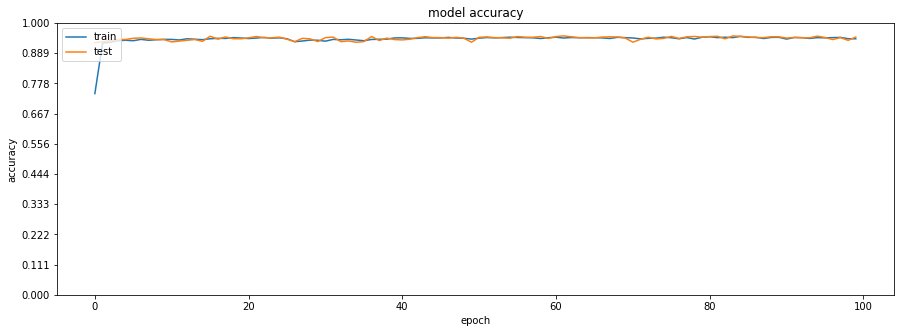

In [241]:
# summarize history for accuracy
ynum=np.linspace(0,1,10)
plt.figure(figsize=(15,5))
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.yticks(ynum)  #no. of points on y axis
plt.legend(['train', 'test'], loc='upper left')
plt.show()

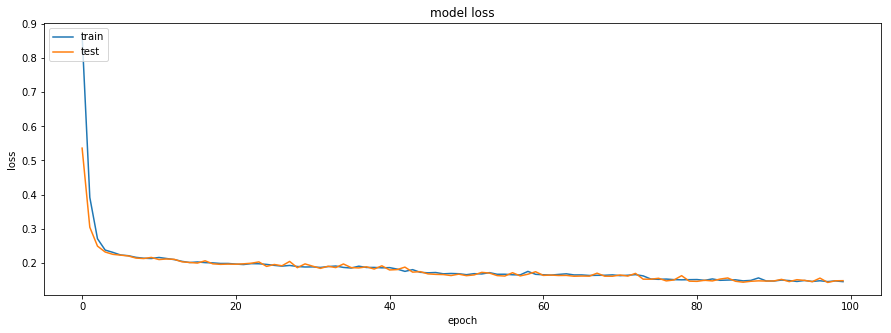

In [242]:
# summarize history for loss
plt.figure(figsize=(15,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [183]:
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=42,stratify=Y,shuffle=True)

In [215]:
X_train, X_test, y_train, y_test = train_test_split(X, Y_dum, test_size=0.2,random_state=42,stratify=Y,shuffle=True)

### Classification using Decision Tree

In [226]:
# Decision Tree Training    
def train_dt(X_train, X_test, y_train, y_test):

    from sklearn.tree import DecisionTreeClassifier
    clf = DecisionTreeClassifier(random_state=0)
    clf.fit(X_train, y_train)
    predict2 = clf.predict(X_test)
    print("Accuracy = {}".format(metrics.accuracy_score(y_test, predict2)))
    #error = y_test - predict2
    #print(predict2)
    #return error
    return predict2

In [229]:
y_pred=train_dt(X_train, X_test, y_train, y_test)

Accuracy = 0.9717727272727272
[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


In [232]:
print('Accuracy :', metrics.accuracy_score(y_test, y_pred)*100)

Accuracy : 97.17727272727272


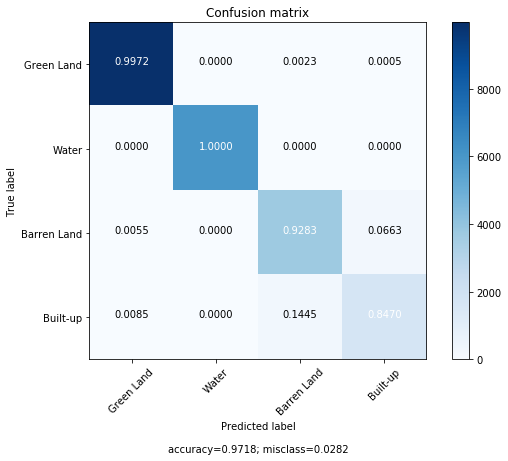

In [233]:
plot_confusion_matrix(confusion_matrix(np.argmax(y_test,axis=1),np.argmax(y_pred,axis=1)),['Green Land','Water','Barren Land','Built-up'])

### Classification using Random Forest

In [208]:
def random_forest(trees,depth,acc):
    from sklearn.ensemble import RandomForestClassifier
    from sklearn import metrics   


    clf = RandomForestClassifier(n_estimators=trees, max_depth=depth,
                                 random_state=0)
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    
    print("Accuracy when no. of trees in forest is ",trees,' and max depth is ',depth,' ---> ',(metrics.accuracy_score(y_test, y_pred)*100),"%",sep='' )
    acc.append(metrics.accuracy_score(y_test, y_pred)*100)
    #print(y_pred,'hdask')
    return y_pred

In [210]:
trees=[50,100,150,200]
depth=[5,10,15,30]
accuracy=[]
y_pred_rf=[]
for i in range(4):
    pred_random_f=random_forest(trees[i],depth[i],accuracy)
    y_pred_rf.append(pred_random_f)
    #print(pred_random_f,'asx')

Accuracy when no. of trees in forest is 50 and max depth is 5 ---> 94.24090909090908%
[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]] hdask
Accuracy when no. of trees in forest is 100 and max depth is 10 ---> 96.76818181818182%
[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]] hdask
Accuracy when no. of trees in forest is 150 and max depth is 15 ---> 97.88181818181818%
[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]] hdask
Accuracy when no. of trees in forest is 200 and max depth is 30 ---> 98.19545454545454%
[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]] hdask


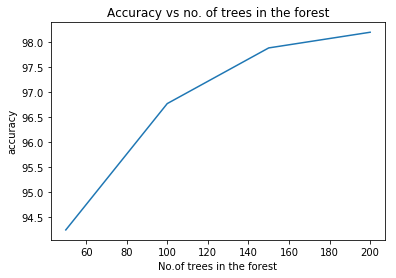

In [211]:
plt.plot(trees,accuracy)
plt.xlabel('No.of trees in the forest')
plt.ylabel('accuracy')
plt.title('Accuracy vs no. of trees in the forest')
plt.show()

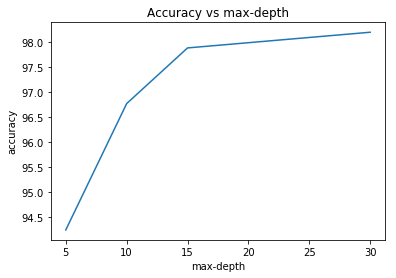

In [212]:
plt.plot(depth,accuracy)
plt.xlabel('max-depth')
plt.ylabel('accuracy')
plt.title('Accuracy vs max-depth')
plt.show()

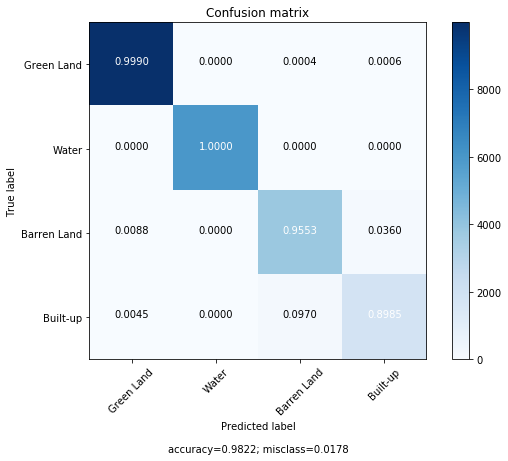

In [214]:
plot_confusion_matrix(confusion_matrix(np.argmax(y_test,axis=1),np.argmax(y_pred_rf[-1],axis=1)),['Green Land','Water','Barren Land','Built-up'])

Thus using Random Forest in the dataset proves that we are 100% accurate while classifying water. Even for other classes the accuracy is very good.

### Extreme Learning Machine (ELM)

In [166]:
#Extreme Learning Machine Training
def train_ELM(X_train, X_test, y_train, y_test,lay,accuracy_elm):

    from sklearn_extensions.extreme_learning_machines.elm import GenELMClassifier
    from sklearn_extensions.extreme_learning_machines.random_layer import RBFRandomLayer, MLPRandomLayer
    import numpy as np
    from sklearn.linear_model import LogisticRegression

    srhl_rbf = RBFRandomLayer(n_hidden=lay, rbf_width=0.1)
    clf = GenELMClassifier(hidden_layer=srhl_rbf)
    clf.fit(X_train, y_train)
    predict2 = clf.predict(X_test)
    #error = y_test - predict2
    print('Accuracy when no. of hidden layers are ',lay, ' --> ',metrics.accuracy_score(y_test, predict2))
    accuracy_elm.append(metrics.accuracy_score(y_test, predict2))
    #print(predict2)
    return predict2

In [169]:
from sklearn.metrics import confusion_matrix
layers=[10,50,100,200,300,400,500]
accuracy_elm=[]
for i in range(7):
    y_pred= train_ELM(X_train, X_test, y_train, y_test,layers[i],accuracy_elm)
    #print(y_pred,'das')
    confusion_matrix(np.argmax(y_test,axis=1),np.argmax(y_pred,axis=1))

Accuracy when no. of hidden layers are  10  -->  0.8856818181818182
Accuracy when no. of hidden layers are  50  -->  0.9155
Accuracy when no. of hidden layers are  100  -->  0.928409090909091
Accuracy when no. of hidden layers are  200  -->  0.9500909090909091
Accuracy when no. of hidden layers are  300  -->  0.9599090909090909
Accuracy when no. of hidden layers are  400  -->  0.9650909090909091
Accuracy when no. of hidden layers are  500  -->  0.9677272727272728


In [173]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
   
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\n \naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

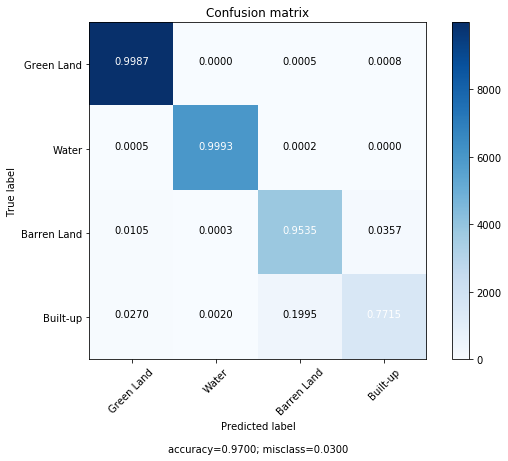

In [174]:
plot_confusion_matrix(confusion_matrix(np.argmax(y_test,axis=1),np.argmax(y_pred,axis=1)),['Green Land','Water','Barren Land','Built-up'])

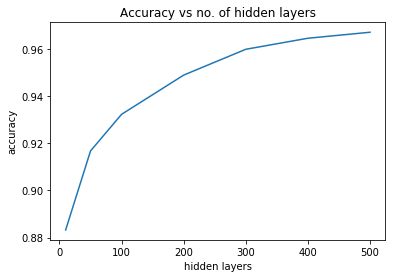

In [155]:
plt.plot(layers,accuracy_elm)
plt.xlabel('hidden layers')
plt.ylabel('accuracy')
plt.title('Accuracy vs no. of hidden layers')
plt.show()

In [235]:
def plotter():
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


    scores = { 'ELM': 96.77,
             'DNN_Model1': 93.47,
             'DNN_Model2': 94.82,
             'Random_Forest': 98.19,
              'Decision tree':97.17
    }
    s = pd.Series(scores)        
    vc = s.sort_index()
    ax = vc.plot(kind='bar')
    plt.title('Accuracy of different algorithms')
    plt.xlabel('Algorithms')
    plt.ylabel('Scores')
    fig = ax.get_figure()
    fig.autofmt_xdate()

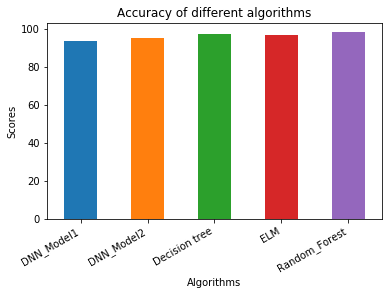

In [236]:
plotter()